In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def find_irrelevant_rows(file_name):
    file = open(file_name, "r")
    i = 0
    res = [0,1]
    for line in file.readlines():
        if line[0] == "?":
            res.append(i)
        i += 1
    file.close()
    return res

In [191]:
names = ["rows", "tot_costs", "exec_time", "exec_time_cs", "plan_time", "ncond", "ind", "stmt"]

no_rls = pd.read_csv("V0/merged_reduced_out.txt", delimiter="|", 
                     header = None, names=names, skiprows=find_irrelevant_rows("V0/merged_reduced_out.txt"))
no_rls["nattr"] = no_rls["ncond"]
no_rls = no_rls[no_rls.rows>0]




stage_acta = pd.read_csv("V1/merged_out.txt", delimiter="|", 
                         header = None, names=names, skiprows=find_irrelevant_rows("V1/merged_out.txt"))
stage_acta["nattr"] = stage_acta["ncond"]+2
stage_acta = stage_acta[stage_acta.rows>0]


acta_tenant = pd.read_csv("V2/merged_out.txt", delimiter="|", 
                          header = None, names=names, skiprows=find_irrelevant_rows("V2/merged_out.txt"))
acta_tenant["nattr"] = acta_tenant["ncond"]+2
acta_tenant = acta_tenant[acta_tenant.rows>0]


ten_ct_acta_stage = pd.read_csv("V3/merged_out1.txt", delimiter="|", 
            header = None, names=names, skiprows=find_irrelevant_rows("V3/merged_out1.txt"))
ten_ct_acta_stage["nattr"] = ten_ct_acta_stage["ncond"]+4
ten_ct_acta_stage = ten_ct_acta_stage[ten_ct_acta_stage.rows>0]


full_rls = pd.read_csv("V4/merged_out.txt", delimiter="|", 
            header = None, names=names, skiprows=find_irrelevant_rows("V4/merged_out.txt"))
full_rls["nattr"] = full_rls["ncond"]+7
full_rls = full_rls[full_rls.rows>0]

# Searching time by configuration and number of attributes

Total size of files stored in the database at the point of gather the data:  479345057

Number of searching queries

In [209]:
labels = ["no RLS", "stage, acta", "acta, tenant", "tenant, CaseType, acta, stage", "full RLS"]
frames = [no_rls, stage_acta, acta_tenant, ten_ct_acta_stage, full_rls]
for frame, label in zip(frames, labels):
    print(f"Queries for {label} = {frame.rows.count()}")

Queries for no RLS = 125
Queries for stage, acta = 216
Queries for acta, tenant = 171
Queries for tenant, CaseType, acta, stage = 467
Queries for full RLS = 24


In [207]:
def plot_exec_time(configs, labels, data_sizes):
    plt.figure(figsize=(13, 8))
    plt.ylabel("Time(ms)")
    plt.xlabel('Number of Filtering Attributes')    
    plt.title("Avg. Searching time for 100mB of data (ms)")
    i = 0
    for conf in configs:
        agg = conf.groupby(["nattr"]).sum()
        time = (agg.exec_time/(data_sizes[i]*conf.groupby(["nattr"]).count()['rows']))*1000000
        plt.scatter(list(time.index), list(time))
        plt.plot(list(time.index), list(time), label = labels[i])
        i+=1
    
    plt.legend()

In [220]:
(125*8794002)/200

5496251.25

# Time in ms

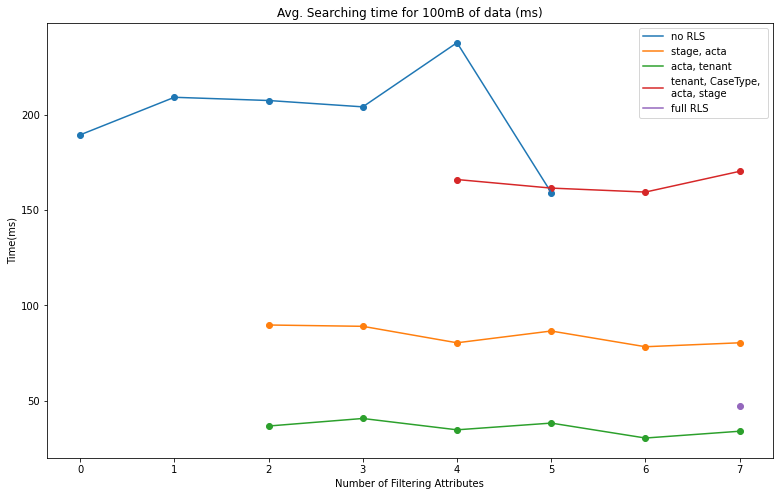

In [219]:
data_sizes = [8794002, 334670+188976, 673866+109440, 51566+20294, 230600]
labels = ["no RLS", "stage, acta", "acta, tenant", "tenant, CaseType, \nacta, stage", "full RLS"]
frames = [no_rls, stage_acta, acta_tenant, ten_ct_acta_stage, full_rls]
plot_exec_time(frames, labels, data_sizes)

# Time in seconds

In [225]:
def plot_exec_time_sec(configs, labels, data_sizes):
    plt.figure(figsize=(13, 8))
    plt.ylabel("Time(sec)")
    plt.xlabel('Number of Filtering Attributes')    
    plt.title("Avg. Searching Time for 100mB of Data (sec)")
    i = 0
    for conf in configs:
        agg = conf.groupby(["nattr"]).sum()
        time = (agg.exec_time/(data_sizes[i]*conf.groupby(["nattr"]).count()['rows']))*1000
        plt.scatter(list(time.index), list(time))
        plt.plot(list(time.index), list(time), label = labels[i])
        i+=1
    
    plt.legend()

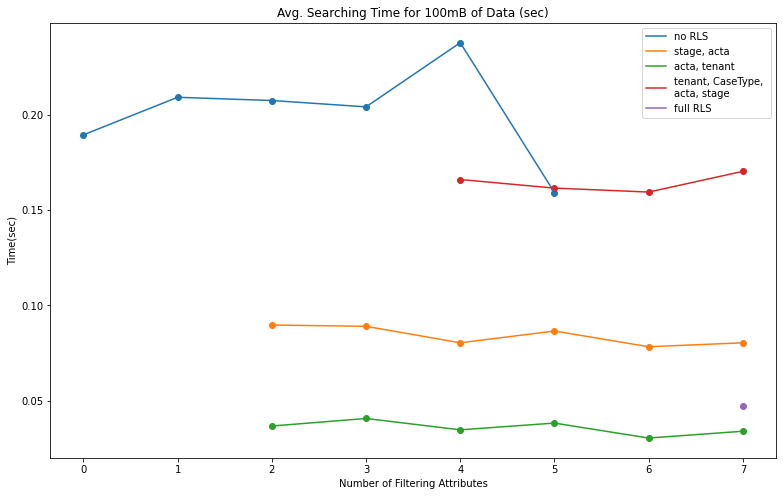

In [226]:
data_sizes = [8794002, 334670+188976, 673866+109440, 51566+20294, 230600]
labels = ["no RLS", "stage, acta", "acta, tenant", "tenant, CaseType, \nacta, stage", "full RLS"]
frames = [no_rls, stage_acta, acta_tenant, ten_ct_acta_stage, full_rls]
plot_exec_time_sec(frames, labels, data_sizes)

# Average time for retrieveing one CaseNumber

In [201]:
def plot_ind_time(configs, labels):
    plt.figure(figsize=(13, 8))
    plt.ylabel("Time(ms)")
    plt.xlabel('Number of Filtering Attributes')    
    plt.title("Avg. Searching retrieving one CaseNUmber (ms)")
    i = 0
    for conf in configs:
        agg = conf.groupby(["nattr"]).sum()
        time = (agg.exec_time/agg.rows)
        plt.scatter(list(time.index), list(time))
        plt.plot(list(time.index), list(time), label = labels[i])
        i+=1
    
    plt.legend()

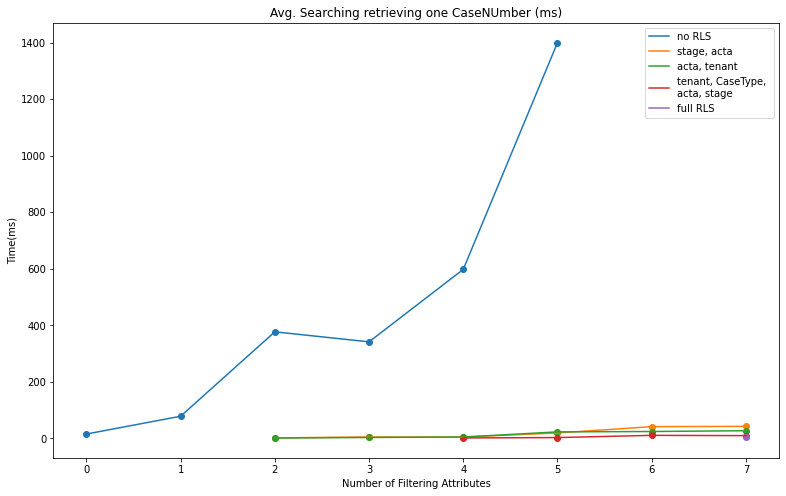

In [204]:
labels = ["no RLS", "stage, acta", "acta, tenant", "tenant, CaseType, \nacta, stage", "full RLS"]
frames = [no_rls, stage_acta, acta_tenant, ten_ct_acta_stage, full_rls]
plot_ind_time(frames, labels)

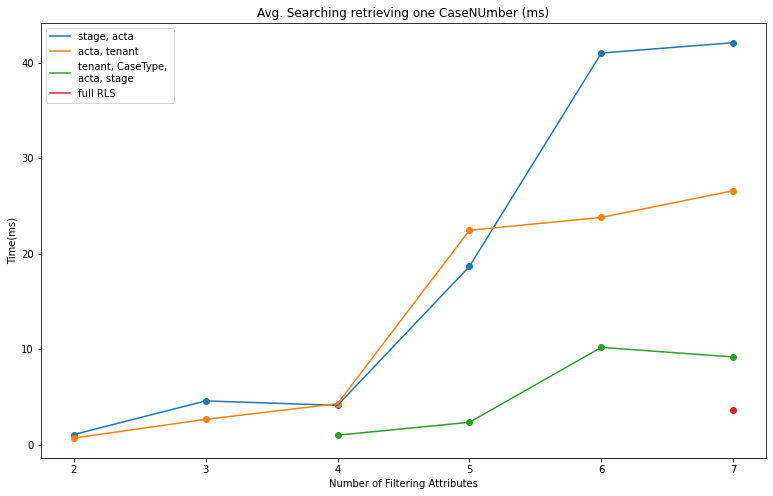

In [203]:
plot_ind_time(frames[1:], labels[1:])